## Assignment for Week 1 - Introduction to Machine Learning

UCI Riverside Heart Disease dataset
We will use the heart.disease.data file, which has 14 attributes and 1 target variable

Objectives:
* Impute missing data (don’t just throw it away)
  * '-9' means missing
* Look at the data with EDA
* Drop unnecessary columns, if needed, and defend your decision to do so.
* Deal with outliers (maybe make a boxplot)
* Provide a brief summary of how you prepared your data for future analysis.

Dataset Location:
http://archive.ics.uci.edu/ml/datasets/heart+Disease
(also provided in the assign_wk1.zip)

Deliverables:

Upload your notebook's .ipynb file
Your completed notebook.

## Introduction
***

This week's assignment provides practice in using the pandas package for describing a dataset, using seaborn and matplotlib to visualize the data, and demonstrating our ability to prepare a dataset for future analysis.

The following datasets were provided for this assignment: heart.disease.data.

### Imports and Setup
***

In [1]:
import pandas as pd
import numpy as np
import math as math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

We can start our exploration by taking a look at what our assignment data looks like.

In [2]:
!head assign_wk1/heart.disease.data

age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
63,1,1,145,233,50,20,1,-9,1,2,150,0,6,0
67,1,4,160,286,40,40,0,-9,1,2,108,1,3,2
67,1,4,120,229,20,35,0,-9,1,2,129,1,7,1
37,1,3,130,250,0,0,0,-9,1,0,187,0,3,0
41,0,2,130,204,0,0,0,-9,1,2,172,0,3,0
56,1,2,120,236,20,20,0,-9,1,0,178,0,3,0
62,0,4,140,268,0,0,0,-9,1,2,160,0,3,3
57,0,4,120,354,0,0,0,-9,1,0,163,1,3,0
63,1,4,130,254,0,0,0,-9,0,2,147,0,7,2


Okay, it looks like we have a CSV with headers, so we can move this directly into a dataframe without needing any additional transformation.

In [3]:
df = pd.read_csv('assign_wk1/heart.disease.data')
df

,age,sex,cp,trestbps,chol,cigs,years,fbs,dm,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50,20,1,-9,1,2,150,0,6,0
1,67,1,4,160,286,40,40,0,-9,1,2,108,1,3,2
2,67,1,4,120,229,20,35,0,-9,1,2,129,1,7,1
3,37,1,3,130,250,0,0,0,-9,1,0,187,0,3,0
4,41,0,2,130,204,0,0,0,-9,1,2,172,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,20,23,0,-9,0,0,152,0,3,0
278,57,1,2,154,232,40,35,0,-9,1,2,164,0,3,1
279,58,0,4,130,197,0,0,0,-9,1,0,131,0,3,0
280,57,1,4,110,335,20,15,0,-9,1,0,143,1,7,2


In [40]:
df.shape

(282, 14)

### Understanding the Dataset
***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  num       282 non-null    int64
dtypes: int64(15)
memory usage: 33.2 KB


In [5]:
df['age'].describe()

count    282.000000
mean      54.411348
std        9.053083
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [6]:
df['sex'].value_counts()

1    191
0     91
Name: sex, dtype: int64

In [7]:
df['cp'].value_counts()

4    133
3     84
2     43
1     22
Name: cp, dtype: int64

In [8]:
df['trestbps'].describe()

count    282.000000
mean     131.563830
std       17.757496
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [9]:
df['chol'].describe()

count    282.000000
mean     249.092199
std       51.217546
min      126.000000
25%      213.000000
50%      244.000000
75%      277.000000
max      564.000000
Name: chol, dtype: float64

In [10]:
# Looks like 5 missing values

df['cigs'].value_counts().head(10)

 0     115
 20     51
 40     30
 30     20
 10     12
 50      9
 60      9
 2       6
 25      6
-9       5
Name: cigs, dtype: int64

In [11]:
# We have 5 missing values here

df['years'].value_counts().head(8)

 0     115
 20     32
 30     27
 40     15
 25     15
 35     12
 15      9
-9       5
Name: years, dtype: int64

In [12]:
df['fbs'].value_counts()

0    240
1     42
Name: fbs, dtype: int64

In [13]:
df.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'cigs', 'years', 'fbs', 'dm',
       'famhist', 'restecg', 'thalach', 'exang', 'thal', 'num'],
      dtype='object')

In [14]:
# 259 missing values

df['dm'].value_counts().index[0]

-9

In [15]:
df['famhist'].value_counts()

1    175
0    107
Name: famhist, dtype: int64

In [16]:
df['restecg'].value_counts()

2    142
0    138
1      2
Name: restecg, dtype: int64

In [17]:
df['thalach'].describe()

count    282.000000
mean     149.765957
std       22.923869
min       71.000000
25%      133.250000
50%      153.500000
75%      165.750000
max      202.000000
Name: thalach, dtype: float64

In [18]:
df['exang'].value_counts()

0    190
1     92
Name: exang, dtype: int64

In [19]:
# Looks like we have 2 missing values here

df['thal'].value_counts()

 3    159
 7    107
 6     14
-9      2
Name: thal, dtype: int64

In [20]:
df['num'].value_counts()

0    157
1     50
3     32
2     31
4     12
Name: num, dtype: int64

## Data Cleanup
***

The first thing that we do is address the missing values. Our missing values counts vary accross a few of our categorical columns. We will start by setting their respective values to something that makes sense for the column, removing the column, or removing the record depending on what makes the most sense.

### Missing Data
***

In [21]:
# First we can remove all of the -9's from our dataframe and leave them as NaN's
# This will let us use the fillna method for replacing our values with the columns mode

df = df[df != -9]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    int64  
 1   sex       282 non-null    int64  
 2   cp        282 non-null    int64  
 3   trestbps  282 non-null    int64  
 4   chol      282 non-null    int64  
 5   cigs      277 non-null    float64
 6   years     277 non-null    float64
 7   fbs       282 non-null    int64  
 8   dm        23 non-null     float64
 9   famhist   282 non-null    int64  
 10  restecg   282 non-null    int64  
 11  thalach   282 non-null    int64  
 12  exang     282 non-null    int64  
 13  thal      280 non-null    float64
 14  num       282 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 33.2 KB


For our categorical columns, which is the only missing data, we will fill the NA's with the mode. We will also need to reset the type for the effected columns back to int64.

In [23]:
for col in df.columns:
    df[col] = df[col].fillna(int(df[col].value_counts().index[0])).astype(int)  # Reset dtype to int
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       282 non-null    int64
 1   sex       282 non-null    int64
 2   cp        282 non-null    int64
 3   trestbps  282 non-null    int64
 4   chol      282 non-null    int64
 5   cigs      282 non-null    int64
 6   years     282 non-null    int64
 7   fbs       282 non-null    int64
 8   dm        282 non-null    int64
 9   famhist   282 non-null    int64
 10  restecg   282 non-null    int64
 11  thalach   282 non-null    int64
 12  exang     282 non-null    int64
 13  thal      282 non-null    int64
 14  num       282 non-null    int64
dtypes: int64(15)
memory usage: 33.2 KB


In [24]:
df['dm'].value_counts()

1    282
Name: dm, dtype: int64

It looks like we only had 1 values in this column, since everything else is missing it is probably best not to assume that the missing values were either 1 or 0 and just drop the column from our analysis.

In [25]:
df.drop(columns='dm', inplace=True)
df

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
0,63,1,1,145,233,50,20,1,1,2,150,0,6,0
1,67,1,4,160,286,40,40,0,1,2,108,1,3,2
2,67,1,4,120,229,20,35,0,1,2,129,1,7,1
3,37,1,3,130,250,0,0,0,1,0,187,0,3,0
4,41,0,2,130,204,0,0,0,1,2,172,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,39,0,3,138,220,20,23,0,0,0,152,0,3,0
278,57,1,2,154,232,40,35,0,1,2,164,0,3,1
279,58,0,4,130,197,0,0,0,1,0,131,0,3,0
280,57,1,4,110,335,20,15,0,1,0,143,1,7,2


### Outliers
***

I am going to start our outliers section by creating an outlier check function, and an outlier fix function that will cap either the min or max to the 1st/99th percentile value.

In [26]:
# Method that graphs a column, shows range, and outliers for determining if we address outliers.
def outlier_check(data, col):
    first_perc = math.floor(data[col].quantile(0.01))
    last_perc = math.ceil(data[col].quantile(0.99))
    sns.boxplot(data[col])
    print(f'Column: {col}')
    print(f'Minimum Value: {data[col].min()}')
    print(f'1st Percentile: {first_perc}')
    print(f'99th Percentile: {last_perc}')
    print(f'Maximum Value: {data[col].max()}')
    

# Method that applies a transform on outliers where requested
def outlier_fix(data, col, min_fix, max_fix):
    bottom = math.floor(data[col].quantile(0.01))
    top = math.ceil(data[col].quantile(0.99))
    if min_fix:
        data.loc[data[col] <= bottom, col] = bottom
    if max_fix:
        data.loc[data[col] >= top, col] = top

Column: age
Minimum Value: 29
1st Percentile: 34
99th Percentile: 72
Maximum Value: 77


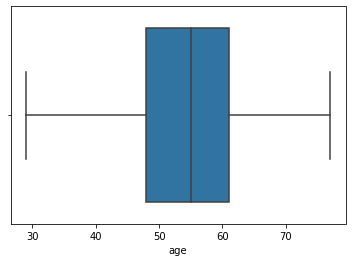

In [27]:
outlier_check(df, 'age')

The age appears to be distributed normally, and without much in terms of outliers so I think we can leave this as it is.

Column: trestbps
Minimum Value: 94
1st Percentile: 100
99th Percentile: 180
Maximum Value: 200


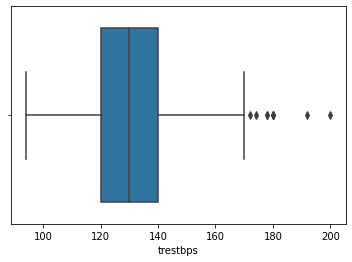

In [28]:
outlier_check(df, 'trestbps')

For the 'trestbps' we have right-skew for the value and should probably bring them to a ceiling value so that they don't apply to much pull on later calculations.

In [29]:
outlier_fix(df, 'trestbps', False, True)

Column: chol
Minimum Value: 126
1st Percentile: 149
99th Percentile: 408
Maximum Value: 564


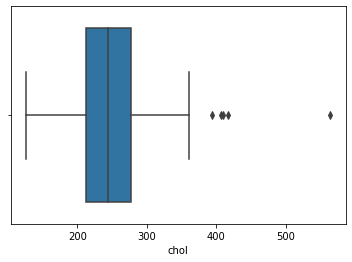

In [30]:
outlier_check(df, 'chol')

For the 'chol' we have right-skew for the value and should probably bring them to a ceiling value so that they don't apply to much pull on later calculations

In [31]:
outlier_fix(df, 'chol', False, True)

Column: cigs
Minimum Value: 0
1st Percentile: 0
99th Percentile: 76
Maximum Value: 99


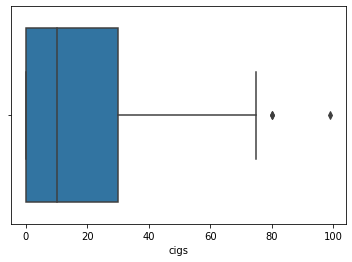

In [32]:
outlier_check(df, 'cigs')

The 'cigs' column is very heavily right-skewed, and not normally distributed due to the type of measure that it is. I think we apply a ceiling for this column as well.

In [33]:
outlier_fix(df, 'cigs', False, True)

Column: years
Minimum Value: 0
1st Percentile: 0
99th Percentile: 50
Maximum Value: 54


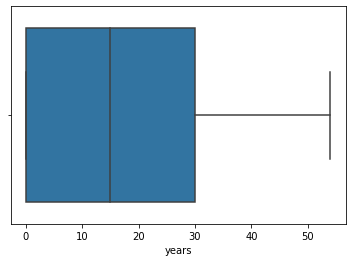

In [34]:
outlier_check(df, 'years')

Column: thalach
Minimum Value: 71
1st Percentile: 95
99th Percentile: 193
Maximum Value: 202


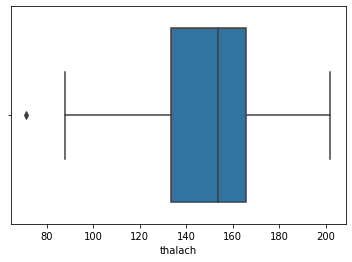

In [35]:
outlier_check(df, 'thalach')

For our 'thalach' column we have lower outliers but no upper bound, so this time we will do our treatment on the bottom value with a floor value.

In [36]:
outlier_fix(df, 'thalach', True, False)

### Visual Exploration
***

Now that we have done the data cleanup, and our data is prepared we ca start looking at the correlations in the data to see if there is a signal for us to eventually use for predition.

<AxesSubplot:>

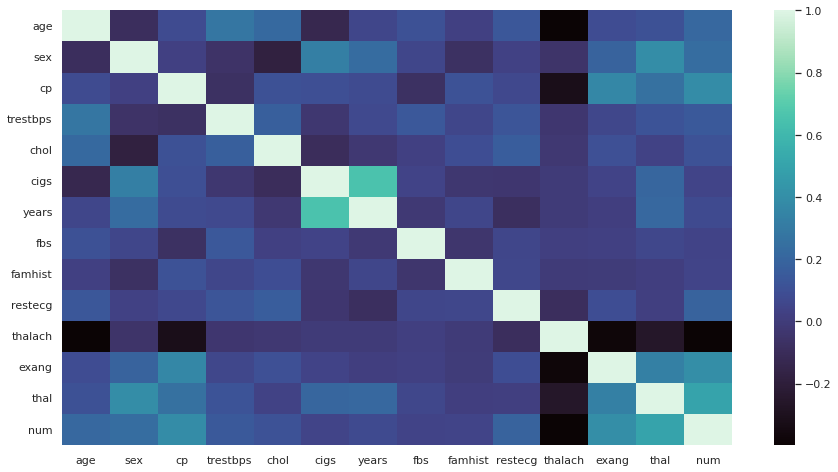

In [37]:
mako = sns.color_palette('mako',as_cmap=True)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=df.corr(), cmap=mako)

In [38]:
cmap = sns.color_palette('vlag', as_cmap=True)

corr = df.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_precision(4)

,age,sex,cp,trestbps,chol,cigs,years,fbs,famhist,restecg,thalach,exang,thal,num
age,1.0000,-0.0911,0.0774,0.2797,0.2140,-0.1319,0.0532,0.1044,0.0259,0.1344,-0.3932,0.0872,0.1050,0.2107
sex,-0.0911,1.0000,0.0226,-0.0559,-0.1825,0.3259,0.2335,0.0544,-0.0708,0.0327,-0.0522,0.1891,0.3909,0.2395
cp,0.0774,0.0226,1.0000,-0.0730,0.1065,0.0953,0.0787,-0.0716,0.1108,0.0610,-0.3187,0.3648,0.2564,0.3839
trestbps,0.2797,-0.0559,-0.0730,1.0000,0.1751,-0.0274,0.0700,0.1372,0.0535,0.1249,-0.0339,0.0582,0.1189,0.1478
chol,0.2140,-0.1825,0.1065,0.1751,1.0000,-0.0970,-0.0254,0.0239,0.0911,0.1639,-0.0254,0.1024,0.0354,0.1134
cigs,-0.1319,0.3259,0.0953,-0.0274,-0.0970,1.0000,0.6557,0.0396,-0.0321,-0.0347,-0.0083,0.0411,0.2060,0.0457
years,0.0532,0.2335,0.0787,0.0700,-0.0254,0.6557,1.0000,-0.0166,0.0547,-0.0861,-0.0054,0.0118,0.2101,0.0716
fbs,0.1044,0.0544,-0.0716,0.1372,0.0239,0.0396,-0.0166,1.0000,-0.0424,0.0540,0.0182,0.0276,0.0567,0.0397
famhist,0.0259,-0.0708,0.1108,0.0535,0.0911,-0.0321,0.0547,-0.0424,1.0000,0.0551,-0.0066,-0.0014,0.0126,0.0486
restecg,0.1344,0.0327,0.0610,0.1249,0.1639,-0.0347,-0.0861,0.0540,0.0551,1.0000,-0.0882,0.0888,0.0209,0.1874


It appears that there are a few values here that we might be able to use as signal, but since this is just the cleaning step we will have to check for colinearity once we know the target values we are trying to predict.

## Summary
***

In this weeks assignment we were given the heart.disease.data dataset and asked to prepare it for future machine learning assignments. Specifically we performed EDA, removed columns that would not be helpful to future models, and addressed outliers. This was accomplished by first getting a feel for the data, shape, info, and descriptive statistics. After this we needed to address missing data. In our dataset this was signified by the '-9' value in any column. We chose to address this by turning all '-9' values into NaN's and using the fillna method to replace with the most common value for our variables. We then tested for outliers on our continuous data columns. For columns where we had outliers we determined which side they were on and a floor or ceiling value that outliers would be set to. After applying our fix for outliers we did a correlation visual two different ways, to start looking at the signal in the data. From here we can identify a target value, category, or classification and apply machine learning algorithms to predict.